# Reading Dataset

In [17]:
import pandas as pd

match_data = pd.read_csv('match_data.csv')

num_matches = int(len(match_data) / 2)

match_data

,ID,Top,Jungle,Mid,Bot,Support,Enemy Top,Enemy Jungle,Enemy Mid,Enemy Bot,...,Team Kills,Team Deaths,Dragons,Dragon Soul,Baron,Rift Herald,First tower,First Kill,Team Total CC,Victory
0,EUW1_6237600858,Singed,Taliyah,Gangplank,Zeri,Renata,Riven,Graves,Swain,Twitch,...,22,41,0,False,0,0,False,False,114,False
1,EUW1_6237600858,Riven,Graves,Swain,Twitch,Lulu,Singed,Taliyah,Gangplank,Zeri,...,41,22,4,True,1,2,True,True,122,True
2,EUW1_6237659232,Akali,Maokai,Yasuo,Ezreal,Pyke,Gangplank,Kindred,Sylas,Aphelios,...,22,38,0,False,1,2,True,True,110,False
3,EUW1_6237659232,Gangplank,Kindred,Sylas,Aphelios,Lulu,Akali,Maokai,Yasuo,Ezreal,...,38,22,3,False,0,0,False,False,108,True
4,EUW1_6238144016,Jayce,Elise,Sylas,Lucian,Sona,Karma,Ekko,Anivia,Caitlyn,...,20,4,1,False,0,2,True,True,32,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16641,EUW1_6261920825,Vi,Alistar,Teemo,Zilean,Nilah,Gangplank,Khazix,Malphite,Rengar,...,52,35,0,False,0,0,True,True,149,True
16642,EUW1_6261924576,Renekton,Karthus,Yasuo,Caitlyn,Lulu,Camille,Viego,Sylas,Jhin,...,0,0,0,False,0,0,False,False,0,False
16643,EUW1_6261924576,Camille,Viego,Sylas,Jhin,Lux,Renekton,Karthus,Yasuo,Caitlyn,...,0,0,0,False,0,0,False,False,0,True
16644,EUW1_6261931674,Fiora,Elise,Varus,Syndra,Alistar,Sett,Nidalee,Yasuo,Sivir,...,7,21,0,False,0,0,False,False,62,False


### We are trying to explore the win/loss ratio of specified attributes.

In [49]:
Gold_Lead_Win = 0
Kill_Lead_Win = 0
Death_Lead_Win = 0
Dragon_Lead_Games = 0
Dragon_Lead_Win = 0
Dragon_Soul_Games = 0
Dragon_Soul_Win =  0
Baron_Games = 0
Baron_Lead_Win = 0
Rift_Games = 0
Rift_Lead_Win = 0
First_Tower_Win = 0
First_Kill_Win = 0
CC_Lead_Win = 0



for i in range(num_matches): 
    Gold_Lead_Win += (match_data["Team Gold"][i] > match_data["Team Gold"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Team Gold"][i + 1] > match_data["Team Gold"][i] and match_data["Victory"][i + 1] == True)
    Kill_Lead_Win += (match_data["Team Kills"][i] > match_data["Team Kills"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Team Kills"][i + 1] > match_data["Team Kills"][i] and match_data["Victory"][i + 1] == True)
    Death_Lead_Win += (match_data["Team Deaths"][i] > match_data["Team Deaths"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Team Deaths"][i + 1] > match_data["Team Deaths"][i] and match_data["Victory"][i + 1] == True)
    Dragon_Lead_Games += (match_data["Dragons"][i] > match_data["Dragons"][i + 1]) | \
                        (match_data["Dragons"][i + 1] > match_data["Dragons"][i + 1])
    Dragon_Lead_Win += (match_data["Dragons"][i] > match_data["Dragons"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Dragons"][i + 1] > match_data["Dragons"][i + 1] and match_data["Victory"][i + 1] == True)
    Dragon_Soul_Games += (match_data["Dragon Soul"][i] == True or match_data["Dragon Soul"][i + 1] == True)
    Dragon_Soul_Win += (match_data["Dragon Soul"][i] == True and match_data["Victory"][i] == True) | \
                        (match_data["Dragon Soul"][i + 1] == True and match_data["Victory"][i + 1] == True)
    Baron_Games += (match_data["Baron"][i] > 0 or match_data["Baron"][i + 1] > 0 )
    Baron_Lead_Win += (match_data["Baron"][i] > match_data["Baron"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Baron"][i + 1] > match_data["Baron"][i] and match_data["Victory"][i + 1] == True)
    Rift_Games += (match_data["Rift Herald"][i] > 0 or match_data["Rift Herald"][i + 1] > 0 )
    Rift_Lead_Win += (match_data["Rift Herald"][i] > match_data["Rift Herald"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Rift Herald"][i + 1] > match_data["Rift Herald"][i] and match_data["Victory"][i + 1] == True)
    First_Tower_Win+= (match_data["First tower"][i] == True and match_data["Victory"][i] == True) | \
                        (match_data["First tower"][i + 1] == True and match_data["Victory"][i + 1] == True)
    First_Kill_Win += (match_data["First Kill"][i] == True and match_data["Victory"][i] == True) | \
                        (match_data["First Kill"][i + 1] == True and match_data["Victory"][i + 1] == True)
    CC_Lead_Win += (match_data["Team Total CC"][i] > match_data["Team Total CC"][i + 1] and match_data["Victory"][i] == True) | \
                        (match_data["Team Total CC"][i + 1] > match_data["Team Total CC"][i] and match_data["Victory"][i + 1] == True)
    

In [55]:
print("Statistics summary:")
print("\nAttribute: X")
print("Out of however many games where there exists {Attribute}, X games were won.\n")
print("Gold Lead Win: ", Gold_Lead_Win)
print("Kill Lead Win: ", Kill_Lead_Win)
print("Death Lead Win: ", Death_Lead_Win)
print("Dragon Lead Win: %d / %d" % (Dragon_Lead_Win, Dragon_Lead_Games))
print("Dragon Soul Win: %d / %d" % (Dragon_Soul_Win, Dragon_Soul_Games))
print("Baron Lead Win: %d / %d" % (Baron_Lead_Win, Baron_Games))
print("Rift Lead Win: %d / %d" % (Rift_Lead_Win, Rift_Games))
print("First Tower Win: ", First_Tower_Win)
print("First Kill Win: ", First_Kill_Win)
print("CC Lead Win: ", CC_Lead_Win)

Statistics summary:

Attribute: X
Out of however many games where there exists {Attribute}, X games were won.

Gold Lead Win:  5936
Kill Lead Win:  6488
Death Lead Win:  1691
Dragon Lead Win: 2535 / 3324
Dragon Soul Win: 1137 / 1272
Baron Lead Win: 4116 / 5521
Rift Lead Win: 3642 / 7139
First Tower Win:  5389
First Kill Win:  4547
CC Lead Win:  4570


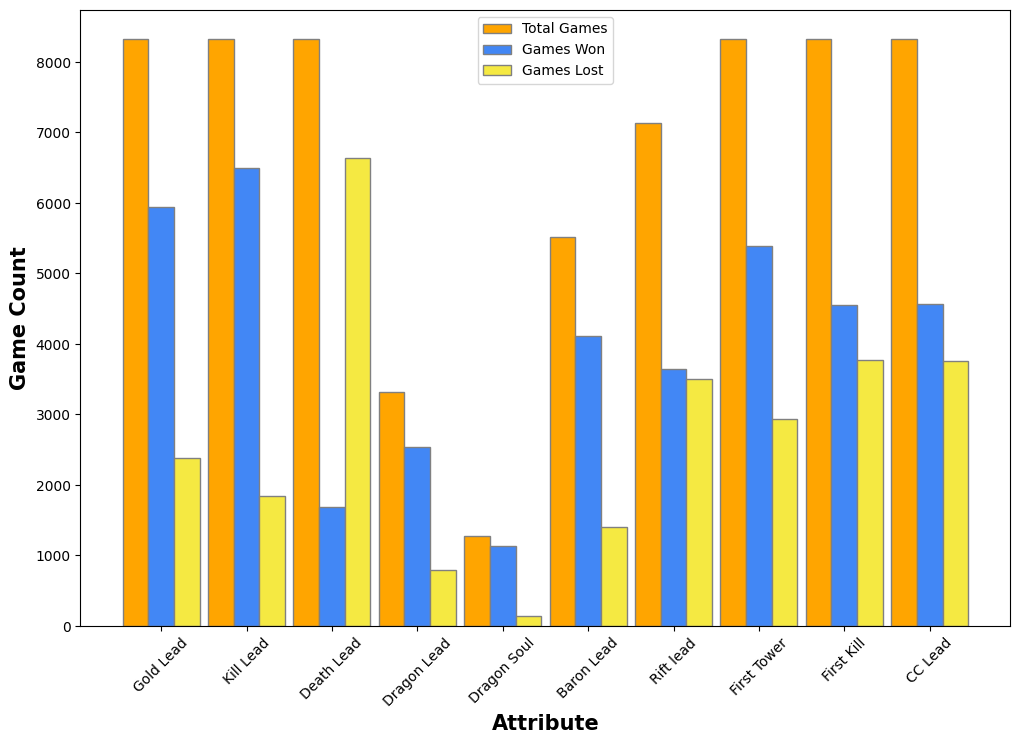

In [72]:
import numpy as np
import matplotlib.pyplot as plt
# Referenced https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))

Games_Won = [Gold_Lead_Win, Kill_Lead_Win, Death_Lead_Win, Dragon_Lead_Win, Dragon_Soul_Win, \
             Baron_Lead_Win, Rift_Lead_Win, First_Tower_Win, First_Kill_Win, CC_Lead_Win]
Total_Games = [num_matches, num_matches, num_matches, Dragon_Lead_Games, Dragon_Soul_Games, \
               Baron_Games, Rift_Games, num_matches, num_matches, num_matches]
Games_Lost = [Total_Games[0]-Gold_Lead_Win, Total_Games[1]-Kill_Lead_Win, Total_Games[2]-Death_Lead_Win, \
              Total_Games[3]-Dragon_Lead_Win, Total_Games[4]-Dragon_Soul_Win, \
             Total_Games[5]-Baron_Lead_Win, Total_Games[6]-Rift_Lead_Win, Total_Games[7]-First_Tower_Win, \
                Total_Games[8]-First_Kill_Win, Total_Games[9]-CC_Lead_Win]

br1 = np.arange(len(Games_Won))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, Total_Games, color ='#FFA500', width = barWidth,
        edgecolor ='grey', label ='Total Games')
plt.bar(br2, Games_Won, color ='#4287f5', width = barWidth,
        edgecolor ='grey', label ='Games Won')
plt.bar(br3, Games_Lost, color ='#f5e942', width = barWidth,
        edgecolor ='grey', label ='Games Lost')

plt.xlabel('Attribute', fontweight ='bold', fontsize = 15)
plt.ylabel('Game Count', fontweight ='bold', fontsize = 15)
plt.xticks(fontsize=10, rotation=45)
plt.xticks([r + barWidth for r in range(len(Games_Won))],
        ['Gold Lead', 'Kill Lead', 'Death Lead', 'Dragon Lead', 'Dragon Soul', \
         'Baron Lead', 'Rift lead', 'First Tower', 'First Kill', 'CC Lead'])

plt.legend()
plt.show()